<a href="https://colab.research.google.com/github/a-ayushigit/Recommendation_movies/blob/main/DataCleanAndVisualize.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd

In [2]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

In [3]:
!kaggle datasets download -d fuzzywizard/movielens-100k-small-dataset

Dataset URL: https://www.kaggle.com/datasets/fuzzywizard/movielens-100k-small-dataset
License(s): unknown
  0% 0.00/971k [00:00<?, ?B/s]
100% 971k/971k [00:00<00:00, 24.4MB/s]


In [4]:
from zipfile import ZipFile
df = '/content/movielens-100k-small-dataset.zip'

with ZipFile(df , 'r') as zip :
     zip.extractall()
     print("The dataset is extracted")

The dataset is extracted


In [5]:
movies = pd.read_csv('/content/movies.csv')
ratings = pd.read_csv('/content/ratings.csv')
tags = pd.read_csv('/content/tags.csv')

In [6]:
movies.head()

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy


In [7]:
ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,964982703
1,1,3,4.0,964981247
2,1,6,4.0,964982224
3,1,47,5.0,964983815
4,1,50,5.0,964982931


In [8]:
movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9742 entries, 0 to 9741
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  9742 non-null   int64 
 1   title    9742 non-null   object
 2   genres   9742 non-null   object
dtypes: int64(1), object(2)
memory usage: 228.5+ KB


In [9]:
ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   userId     100836 non-null  int64  
 1   movieId    100836 non-null  int64  
 2   rating     100836 non-null  float64
 3   timestamp  100836 non-null  int64  
dtypes: float64(1), int64(3)
memory usage: 3.1 MB


In [10]:
df1 = movies.merge(ratings , on="movieId" , how="inner")

In [11]:
df1.head()

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0,964982703
1,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,5,4.0,847434962
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5,1106635946
3,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,15,2.5,1510577970
4,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,17,4.5,1305696483


In [12]:
df1.drop('timestamp' , axis=1 , inplace=True)

In [13]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100836 entries, 0 to 100835
Data columns (total 5 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   movieId  100836 non-null  int64  
 1   title    100836 non-null  object 
 2   genres   100836 non-null  object 
 3   userId   100836 non-null  int64  
 4   rating   100836 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 3.8+ MB


In [14]:
df1.iloc[:,4:].describe()

,rating
count,100836.000000
mean,3.501557
std,1.042529
min,0.500000
25%,3.000000
50%,3.500000
75%,4.000000
max,5.000000


In [15]:
#count of individual genres
genres = {}

def count_genres():
  for genre in movies['genres']:
    words = genre.split('|')
    for word in words :
      genres[word] = genres.get(word,0)+1 #counts the occurrences of genre in the dataframe

count_genres()

In [16]:
genres

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 '(no genres listed)': 34}

In [17]:
# replace the no genres listed to None
genres['None'] = genres.pop('(no genres listed)')
#returns the value of the mentioned key

In [18]:
genres

{'Adventure': 1263,
 'Animation': 611,
 'Children': 664,
 'Comedy': 3756,
 'Fantasy': 779,
 'Romance': 1596,
 'Drama': 4361,
 'Action': 1828,
 'Crime': 1199,
 'Thriller': 1894,
 'Horror': 978,
 'Mystery': 573,
 'Sci-Fi': 980,
 'War': 382,
 'Musical': 334,
 'Documentary': 440,
 'IMAX': 158,
 'Western': 167,
 'Film-Noir': 87,
 'None': 34}

In [19]:
movies['genres'] = movies['genres'].apply(lambda x : x.split('|'))
movies.head(10)

,movieId,title,genres
0,1,Toy Story (1995),"[Adventure, Animation, Children, Comedy, Fantasy]"
1,2,Jumanji (1995),"[Adventure, Children, Fantasy]"
2,3,Grumpier Old Men (1995),"[Comedy, Romance]"
3,4,Waiting to Exhale (1995),"[Comedy, Drama, Romance]"
4,5,Father of the Bride Part II (1995),[Comedy]
5,6,Heat (1995),"[Action, Crime, Thriller]"
6,7,Sabrina (1995),"[Comedy, Romance]"
7,8,Tom and Huck (1995),"[Adventure, Children]"
8,9,Sudden Death (1995),[Action]
9,10,GoldenEye (1995),"[Action, Adventure, Thriller]"


In [20]:
exploded_movies = movies.explode('genres')
exploded_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure
0,1,Toy Story (1995),Animation
0,1,Toy Story (1995),Children
0,1,Toy Story (1995),Comedy
0,1,Toy Story (1995),Fantasy
...,...,...,...
9738,193583,No Game No Life: Zero (2017),Fantasy
9739,193585,Flint (2017),Drama
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Action
9740,193587,Bungo Stray Dogs: Dead Apple (2018),Animation


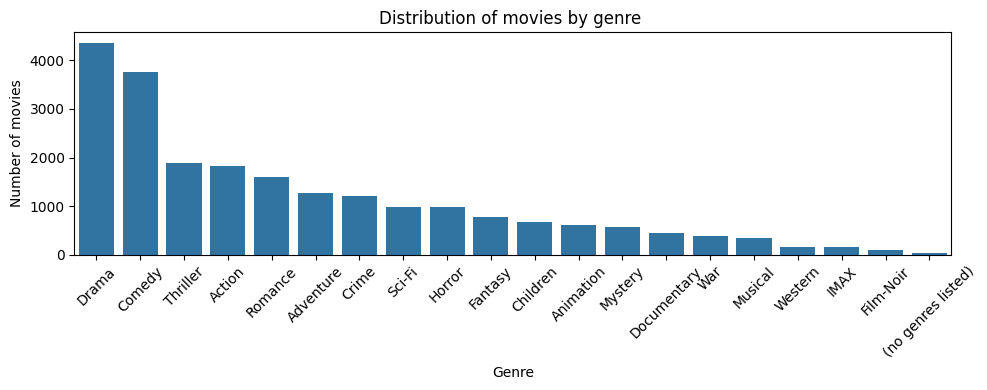

In [21]:
plt.figure(figsize=(10,4))
sns.countplot(data = exploded_movies , x='genres' , order=exploded_movies['genres'].value_counts().index)
plt.title('Distribution of movies by genre ')
plt.xlabel('Genre')
plt.ylabel('Number of movies')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [22]:
exploded_movies = exploded_movies.merge(ratings , on='movieId' , how='inner' )
exploded_movies

,movieId,title,genres,userId,rating,timestamp
0,1,Toy Story (1995),Adventure,1,4.0,964982703
1,1,Toy Story (1995),Adventure,5,4.0,847434962
2,1,Toy Story (1995),Adventure,7,4.5,1106635946
3,1,Toy Story (1995),Adventure,15,2.5,1510577970
4,1,Toy Story (1995),Adventure,17,4.5,1305696483
...,...,...,...,...,...,...
274475,193583,No Game No Life: Zero (2017),Fantasy,184,3.5,1537109545
274476,193585,Flint (2017),Drama,184,3.5,1537109805
274477,193587,Bungo Stray Dogs: Dead Apple (2018),Action,184,3.5,1537110021
274478,193587,Bungo Stray Dogs: Dead Apple (2018),Animation,184,3.5,1537110021


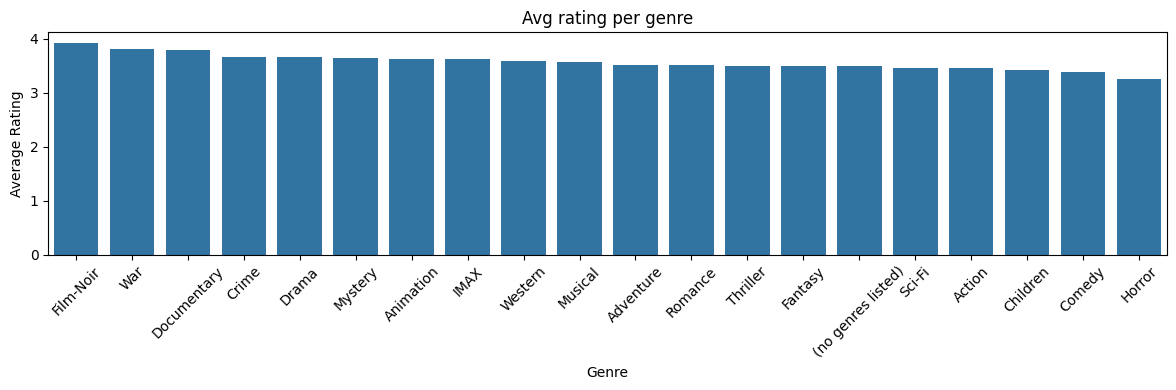

In [23]:
avg_rating_per_genre = exploded_movies.groupby('genres')['rating'].mean().reset_index()

plt.figure(figsize=(12,4))
sns.barplot(data = avg_rating_per_genre , x='genres' , y='rating' , order=avg_rating_per_genre.sort_values('rating' , ascending=False)['genres'])
plt.title('Avg rating per genre')
plt.xlabel('Genre')
plt.ylabel('Average Rating')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


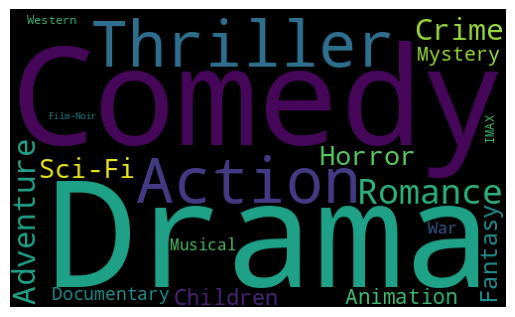

In [24]:
#prepare a wordcloud
from wordcloud import WordCloud
wordcloud = WordCloud(width=500 , height=300 , background_color='black' , min_font_size=7).generate_from_frequencies(genres)

plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [25]:
df_n_ratings = pd.DataFrame(df1.groupby('title')['rating'].mean())

In [26]:
df_n_ratings.head()

,rating
title,
'71 (2014),4.0
'Hellboy': The Seeds of Creation (2004),4.0
'Round Midnight (1986),3.5
'Salem's Lot (2004),5.0
'Til There Was You (1997),4.0


In [27]:
df_n_ratings['total ratings'] = df1.groupby('title')['rating'].count()

In [28]:
df_n_ratings.rename(columns = {'rating': 'mean ratings'}, inplace=True)

In [29]:
df_n_ratings['mean ratings'] = df_n_ratings['mean ratings'].apply(lambda x : round(x , 2))

In [30]:
df_n_ratings.head()

,mean ratings,total ratings
title,,
'71 (2014),4.0,1
'Hellboy': The Seeds of Creation (2004),4.0,1
'Round Midnight (1986),3.5,2
'Salem's Lot (2004),5.0,1
'Til There Was You (1997),4.0,2


In [31]:
df_n_ratings.sort_values('total ratings', ascending=False).head(10)

,mean ratings,total ratings
title,,
Forrest Gump (1994),4.16,329
"Shawshank Redemption, The (1994)",4.43,317
Pulp Fiction (1994),4.20,307
"Silence of the Lambs, The (1991)",4.16,279
"Matrix, The (1999)",4.19,278
Star Wars: Episode IV - A New Hope (1977),4.23,251
Jurassic Park (1993),3.75,238
Braveheart (1995),4.03,237
Terminator 2: Judgment Day (1991),3.97,224


<Figure size 600x400 with 0 Axes>

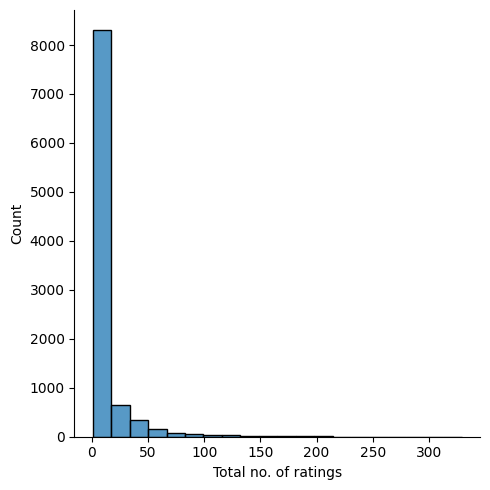

In [32]:
plt.figure(figsize=(6,4))
sns.displot(df_n_ratings['total ratings'] , bins=20) # bins = no. pf parts x axis is divided into
plt.xlabel('Total no. of ratings')
plt.ylabel('Count')
plt.show()

In [33]:
df_n_ratings.sort_values('mean ratings' , ascending=False).head(10)

,mean ratings,total ratings
title,,
A Perfect Day (2015),5.0,1
Last Year's Snow Was Falling (1983),5.0,1
Sun Alley (Sonnenallee) (1999),5.0,1
"Four Days in September (O Que É Isso, Companheiro?) (1997)",5.0,1
The Love Bug (1997),5.0,1
Lady Jane (1986),5.0,1
Travels of an Ant (1983),5.0,1
"Four Seasons, The (1981)",5.0,1
Unfaithfully Yours (1948),5.0,1


In [34]:
print("Total no. of movies with average rating of 5.0 :" , len(df_n_ratings.loc[df_n_ratings['mean ratings'] == 5]))
print("Total no. of individual users that gave a rating of 5.0 :" , len(df_n_ratings.loc[(df_n_ratings['mean ratings'] == 5) &(df_n_ratings['total ratings'] == 1) ]))

Total no. of movies with average rating of 5.0 : 296
Total no. of individual users that gave a rating of 5.0 : 289


<Figure size 600x400 with 0 Axes>

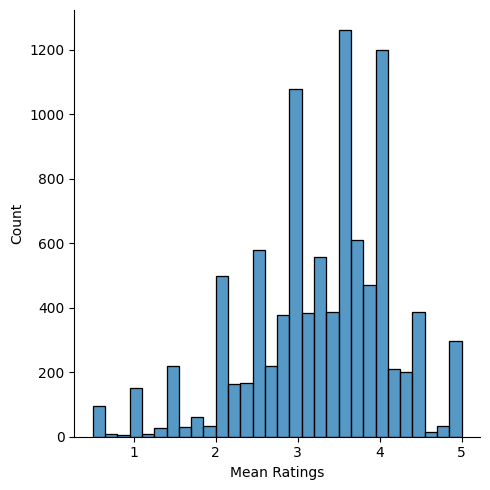

In [35]:
plt.figure(figsize=(6,4))
sns.displot(df_n_ratings['mean ratings'] , bins=30)
plt.xlabel('Mean Ratings')
plt.ylabel('Count')
plt.show()

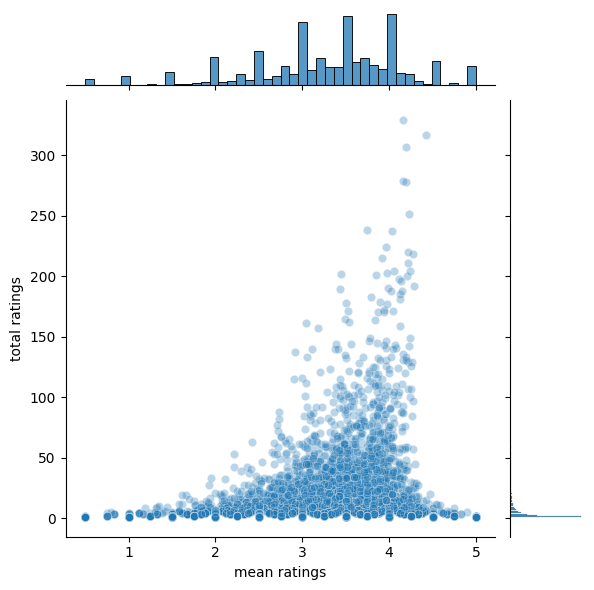

In [36]:
sns.jointplot(x = 'mean ratings', y = 'total ratings', data = df_n_ratings , alpha=0.3)

In [37]:
df_num_rating = df1.groupby('title').count()['rating'].reset_index()

In [38]:
df_num_rating.rename(columns={'rating' : 'num_ratings'} , inplace=True)

In [39]:
df_num_rating.head()

,title,num_ratings
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),2
3,'Salem's Lot (2004),1
4,'Til There Was You (1997),2


In [40]:
df_avg_rating = df1.groupby('title').mean(numeric_only=True)['rating'].reset_index()

In [41]:
df_avg_rating.rename(columns={'rating': 'avg_rating'},inplace=True)

In [42]:
df_avg_rating.head()

,title,avg_rating
0,'71 (2014),4.0
1,'Hellboy': The Seeds of Creation (2004),4.0
2,'Round Midnight (1986),3.5
3,'Salem's Lot (2004),5.0
4,'Til There Was You (1997),4.0


In [44]:
#No. of ratings given by each user
sample_df = df1.groupby('userId').count()['rating'].reset_index()
sample_df.head()

,userId,rating
0,1,232
1,2,29
2,3,39
3,4,216
4,5,44


In [45]:
sample_df.describe()

,userId,rating
count,610.000000,610.000000
mean,305.500000,165.304918
std,176.236111,269.480584
min,1.000000,20.000000
25%,153.250000,35.000000
50%,305.500000,70.500000
75%,457.750000,168.000000
max,610.000000,2698.000000


In [47]:
#keep users who have given more than 150 ratings
filter_criteria = df1.groupby('userId').count()['rating'] > 150
filtered_users = filter_criteria[filter_criteria].index

In [48]:
filtered_users

Index([  1,   4,   6,   7,  18,  19,  20,  21,  28,  33,
       ...
       596, 597, 599, 600, 603, 605, 606, 607, 608, 610],
      dtype='int64', name='userId', length=173)

In [50]:
filtered_rating = df1[df1['userId'].isin(filtered_users)]

In [51]:
filtered_rating.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5


In [52]:
sample_movie_df = filtered_rating.groupby('title').count()['rating'].reset_index()

In [53]:
sample_movie_df.head()

,title,rating
0,'71 (2014),1
1,'Hellboy': The Seeds of Creation (2004),1
2,'Round Midnight (1986),1
3,'Tis the Season for Love (2015),1
4,"'burbs, The (1989)",14


In [54]:
sample_movie_df.describe()

,rating
count,9371.000000
mean,8.018781
std,14.283666
min,1.000000
25%,1.000000
50%,2.000000
75%,8.000000
max,142.000000


In [55]:
#eliminate all movies which have been given less than 15 ratings
movie_filter_criteria = filtered_rating.groupby('title').count()['rating'] >= 15

In [56]:
famous_movies = movie_filter_criteria[movie_filter_criteria].index

In [57]:
famous_movies

Index(['(500) Days of Summer (2009)', '10 Things I Hate About You (1999)',
       '101 Dalmatians (1996)',
       '101 Dalmatians (One Hundred and One Dalmatians) (1961)',
       '12 Angry Men (1957)', '127 Hours (2010)', '13 Going on 30 (2004)',
       '13th Warrior, The (1999)', '1408 (2007)',
       '2 Fast 2 Furious (Fast and the Furious 2, The) (2003)',
       ...
       'Young Guns (1988)', 'Zack and Miri Make a Porno (2008)',
       'Zero Effect (1998)', 'Zodiac (2007)', 'Zombieland (2009)',
       'Zoolander (2001)', 'Zootopia (2016)', 'eXistenZ (1999)', 'xXx (2002)',
       '¡Three Amigos! (1986)'],
      dtype='object', name='title', length=1393)

In [58]:
df_final = filtered_rating[filtered_rating['title'].isin(famous_movies)]

In [59]:
df_final.head()

,movieId,title,genres,userId,rating
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1,4.0
2,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,7,4.5
5,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,18,3.5
6,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,19,4.0
7,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,21,3.5


In [60]:
df_final.describe()

,movieId,userId,rating
count,48691.000000,48691.000000,48691.000000
mean,14258.254873,325.461030,3.567004
std,27688.916110,183.214082,0.987207
min,1.000000,1.000000,0.500000
25%,1220.000000,177.000000,3.000000
50%,2701.000000,318.000000,4.000000
75%,6333.000000,480.000000,4.000000
max,168252.000000,610.000000,5.000000


In [61]:
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Index: 48691 entries, 0 to 100334
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   movieId  48691 non-null  int64  
 1   title    48691 non-null  object 
 2   genres   48691 non-null  object 
 3   userId   48691 non-null  int64  
 4   rating   48691 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.2+ MB


In [62]:
len(df_final['title'].unique())

1393

In [63]:
df_final.to_csv('/content/final_df.csv')